In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


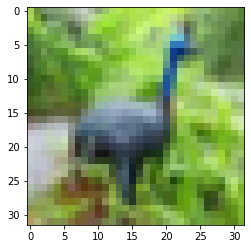

In [ ]:
plt.imshow(x_train[6],cmap=plt.cm.binary)

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


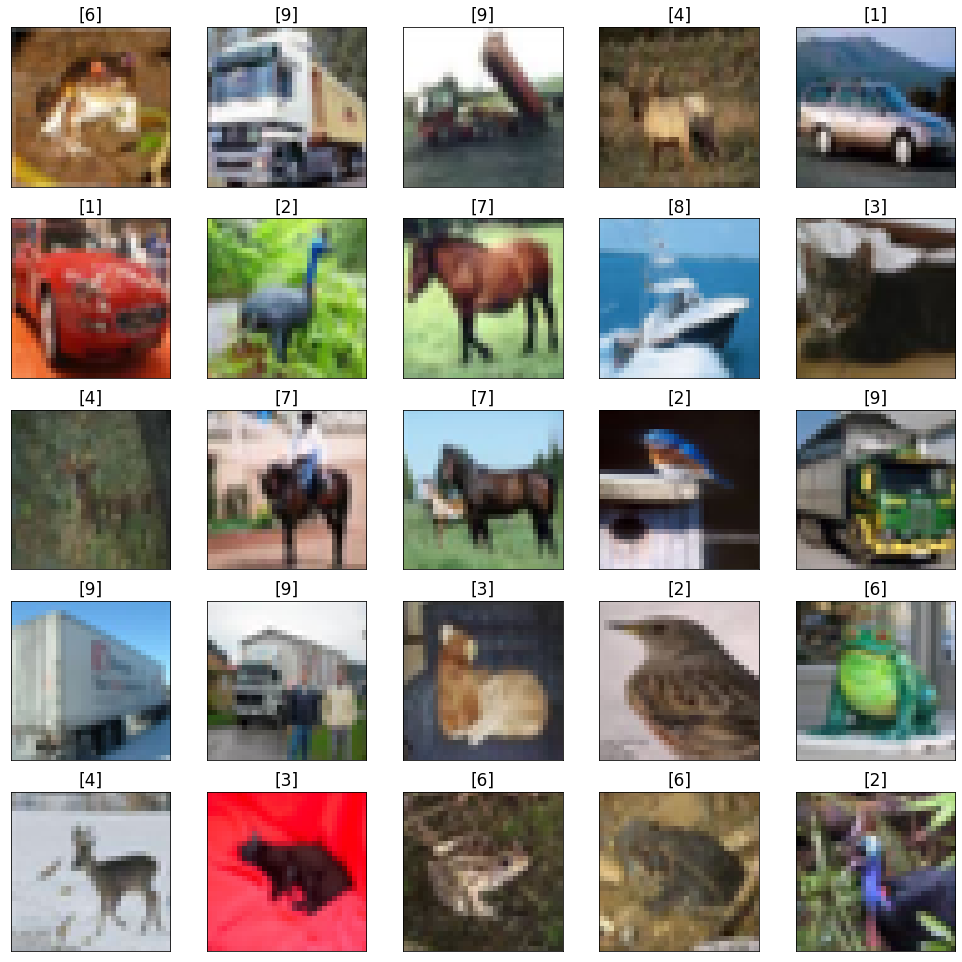

In [ ]:
plt.figure(figsize=(17,17))
for i  in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],'gray')
  plt.title(y_train[i],fontsize=17)
plt.show()

In [ ]:
x_train=tf.keras.utils.normalize(x_train)
x_test=tf.keras.utils.normalize(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout

In [ ]:
#### Creating a neural network
m1=Sequential()

#### First layer
m1.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
m1.add(Activation("relu"))#activation function
m1.add(MaxPooling2D(pool_size=(2,2)))

#### Second Layer
m1.add(Conv2D(64,(3,3)))
m1.add(Activation("relu"))#activation function
m1.add(MaxPooling2D(pool_size=(2,2)))

#### Third Layer
m1.add(Conv2D(64,(3,3)))
m1.add(Activation("relu"))#activation function
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dense(64))
m1.add(Activation("relu"))

m1.add(Dense(32))
m1.add(Activation("relu"))

m1.add(Dense(10))
m1.add(Activation('softmax'))


In [ ]:
m1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 activation_18 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 activation_19 (Activation)  (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                 

In [ ]:
m1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['acc'])

In [ ]:
h1=m1.fit(x_train,y_train,epochs=7,validation_data=(x_test,y_test))

Epoch 1/7
1563/1563 [==============================] - 129s 83ms/step - loss: 1.7408 - acc: 0.3650 - val_loss: 1.6401 - val_acc: 0.4108
Epoch 2/7
1563/1563 [==============================] - 132s 84ms/step - loss: 1.5953 - acc: 0.4267 - val_loss: 1.5713 - val_acc: 0.4372
Epoch 3/7
1563/1563 [==============================] - 129s 83ms/step - loss: 1.5235 - acc: 0.4540 - val_loss: 1.5337 - val_acc: 0.4500
Epoch 4/7
1563/1563 [==============================] - 126s 81ms/step - loss: 1.4713 - acc: 0.4761 - val_loss: 1.4645 - val_acc: 0.4794
Epoch 5/7
1563/1563 [==============================] - 128s 82ms/step - loss: 1.4298 - acc: 0.4901 - val_loss: 1.4606 - val_acc: 0.4781
Epoch 6/7
1563/1563 [==============================] - 128s 82ms/step - loss: 1.3930 - acc: 0.5037 - val_loss: 1.4398 - val_acc: 0.4844
Epoch 7/7
1563/1563 [==============================] - 127s 81ms/step - loss: 1.3582 - acc: 0.5157 - val_loss: 1.4175 - val_acc: 0.4998


In [ ]:
r1=pd.DataFrame(h1.history)
r1['Epochs']=h1.epoch
r1.tail()

,loss,acc,val_loss,val_acc,Epochs
2,1.523509,0.45400,1.533680,0.4500,2
3,1.471271,0.47610,1.464550,0.4794,3
4,1.429849,0.49012,1.460585,0.4781,4
5,1.392995,0.50374,1.439829,0.4844,5
6,1.358178,0.51570,1.417486,0.4998,6


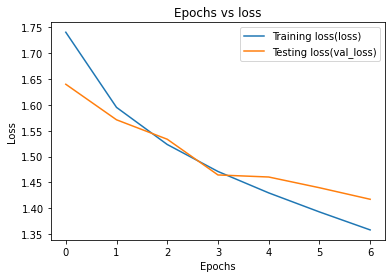

In [ ]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss(loss)')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss(val_loss)')
plt.title('Epochs vs loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

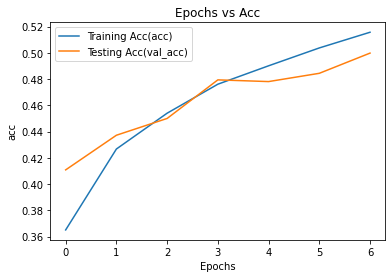

In [ ]:
plt.plot(r1['Epochs'],r1['acc'],label='Training Acc(acc)')
plt.plot(r1['Epochs'],r1['val_acc'],label='Testing Acc(val_acc)')
plt.title('Epochs vs Acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
ypred=m1.predict(x_testr)
print(len(ypred))
print(ypred)

313/313 [==============================] - 6s 20ms/step
10000
[[3.3176285e-03 7.4777957e-03 7.9525979e-03 ... 1.9746626e-02
  1.9233786e-02 8.1941867e-03]
 [8.9076627e-03 1.7798377e-02 3.2830518e-04 ... 8.6574464e-06
  9.6371818e-01 8.8351658e-03]
 [3.6843501e-02 2.9244387e-01 2.8298244e-02 ... 1.5390551e-02
  1.5914702e-01 2.9655668e-01]
 ...
 [7.4239413e-04 2.2368911e-03 2.7391735e-02 ... 2.6030336e-02
  5.3096650e-04 3.0734572e-03]
 [9.7452752e-02 7.7358849e-02 1.0005043e-01 ... 1.8027483e-01
  3.6431614e-02 2.5029352e-01]
 [3.8389785e-03 5.4387003e-04 9.5371574e-02 ... 2.5114125e-01
  1.7008677e-03 8.2360982e-04]]


In [ ]:
ypred1=[np.argmax(i) for i in ypred]
ypred1

[3,
 8,
 9,
 1,
 4,
 6,
 1,
 6,
 5,
 1,
 8,
 1,
 5,
 7,
 9,
 8,
 5,
 9,
 8,
 6,
 7,
 2,
 0,
 9,
 2,
 4,
 4,
 2,
 7,
 6,
 6,
 2,
 2,
 5,
 7,
 1,
 4,
 0,
 9,
 3,
 8,
 6,
 3,
 6,
 0,
 0,
 2,
 8,
 7,
 6,
 8,
 8,
 2,
 5,
 8,
 8,
 5,
 6,
 2,
 2,
 7,
 3,
 6,
 2,
 6,
 2,
 1,
 2,
 9,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 6,
 8,
 3,
 0,
 3,
 1,
 1,
 0,
 2,
 9,
 8,
 4,
 8,
 9,
 0,
 6,
 8,
 6,
 7,
 5,
 6,
 0,
 2,
 7,
 7,
 9,
 1,
 6,
 1,
 1,
 3,
 6,
 7,
 3,
 4,
 0,
 2,
 2,
 9,
 4,
 0,
 2,
 3,
 9,
 0,
 5,
 1,
 2,
 0,
 2,
 4,
 5,
 1,
 4,
 4,
 1,
 1,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 4,
 5,
 6,
 9,
 8,
 6,
 5,
 6,
 3,
 5,
 0,
 1,
 6,
 0,
 0,
 6,
 6,
 0,
 6,
 4,
 2,
 9,
 3,
 6,
 8,
 7,
 8,
 2,
 3,
 4,
 9,
 3,
 2,
 8,
 9,
 9,
 5,
 7,
 7,
 9,
 0,
 7,
 2,
 3,
 4,
 8,
 6,
 3,
 6,
 8,
 6,
 3,
 4,
 1,
 3,
 4,
 3,
 2,
 7,
 8,
 9,
 4,
 8,
 7,
 1,
 3,
 2,
 4,
 7,
 0,
 3,
 1,
 1,
 7,
 9,
 2,
 4,
 9,
 0,
 7,
 7,
 7,
 9,
 5,
 7,
 7,
 6,
 6,
 3,
 9,
 5,
 1,
 3,
 1,
 0,
 0,
 6,
 0,
 3,
 3,
 1,
 1,
 0,
 1,
 0,
 6,
 9,
 0,
 2,
 6,


In [ ]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm=confusion_matrix(y_test,ypred1)
print(cm)


[[566  48  68  26  25   3  34  26 123  81]
 [ 71 601  16  35   7  10  18  13  50 179]
 [ 59  26 482  61  92  61 112  64  20  23]
 [ 32  20  80 370  59 131 168  55  27  58]
 [ 38  11 181  53 398  26 142 108  21  22]
 [ 19  19 120 290  50 247  98  85  22  50]
 [  8  13  90  84  66  21 660  23   8  27]
 [ 32  11  77  64  78  51  40 579   9  59]
 [149  69  29  37  20  14  18  16 577  71]
 [ 80 158  36  46  18  12  35  35  62 518]]


In [ ]:
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

           0       0.54      0.57      0.55      1000
           1       0.62      0.60      0.61      1000
           2       0.41      0.48      0.44      1000
           3       0.35      0.37      0.36      1000
           4       0.49      0.40      0.44      1000
           5       0.43      0.25      0.31      1000
           6       0.50      0.66      0.57      1000
           7       0.58      0.58      0.58      1000
           8       0.63      0.58      0.60      1000
           9       0.48      0.52      0.50      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

